In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter, MaxNLocator

In [2]:
# Download the merged dataset from GitHub
!wget https://raw.githubusercontent.com/Sarah0215/Project4_Group9/main/spark_cawildfire_percent75_data.csv -O spark_cawildfire_percent75_data.csv

--2024-07-23 01:13:34--  https://raw.githubusercontent.com/Sarah0215/Project4_Group9/main/spark_cawildfire_percent75_data.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 602249 (588K) [text/plain]
Saving to: ‘spark_cawildfire_percent75_data.csv’

spark_cawildfire_pe 100%[===================>] 588.13K  --.-KB/s    in 0.05s   

2024-07-23 01:13:34 (11.0 MB/s) - ‘spark_cawildfire_percent75_data.csv’ saved [602249/602249]



In [3]:
# Load the merged dataset
merged_data = pd.read_csv('spark_cawildfire_percent75_data.csv')
merged_data.head()

,incident_name,incident_is_final,incident_date_last_update,incident_date_created,incident_administrative_unit,incident_county,incident_acres_burned,incident_containment,incident_cooperating_agencies,incident_longitude,...,containment_time,day_of_year_created,day_of_week_created,month_created,year_created,day_of_year_extinguished,day_of_week_extinguished,month_extinguished,year_extinguished,containment_time_class
0,Bridge Fire,Y,2018-01-09 13:46:00+00:00,2017-10-31 11:22:00+00:00,Shasta-Trinity National Forest,Shasta,37.0,100.0,Shasta-Trinity National Forest,-122.309000,...,1682.400000,304,1,10,2017,9,1,1,2018,long
1,Pala Fire,Y,2020-09-16 14:07:35+00:00,2009-05-24 14:56:00+00:00,CAL FIRE San Diego Unit,San Diego,122.0,100.0,CAL FIRE San Diego Unit,1.000000,...,9.066667,144,6,5,2009,145,0,5,2009,short
2,River Fire,Y,2022-10-24 11:39:23+00:00,2013-02-24 08:16:00+00:00,CAL FIRE San Bernardino Unit,Inyo,407.0,100.0,"CAL FIRE San Bernardino Unit, Inyo County Sher...",-118.016510,...,107.733333,55,6,2,2013,59,3,2,2013,long
3,Fawnskin Fire,Y,2013-04-22 09:00:00+00:00,2013-04-20 17:30:00+00:00,San Bernardino National Forest,San Bernardino,30.0,100.0,San Bernardino National Forest,-116.941311,...,39.500000,110,5,4,2013,112,0,4,2013,medium
4,Gold Fire,Y,2013-05-01 07:00:00+00:00,2013-04-30 12:59:00+00:00,CAL FIRE Madera-Mariposa-Merced Unit,Madera,274.0,100.0,CAL FIRE Madera-Mariposa-Merced Unit,-119.635004,...,18.016667,120,1,4,2013,121,2,5,2013,short


In [20]:
# Define selected features
features = [
    'incident_acres_burned', 'county_population', 'mean_temperature',
    'incident_latitude', 'incident_longitude', 'day_of_year_created',
    'day_of_week_created', 'month_created', 'year_created',
    'day_of_year_extinguished', 'day_of_week_extinguished',
    'month_extinguished', 'year_extinguished'
]

target = 'containment_time_class'

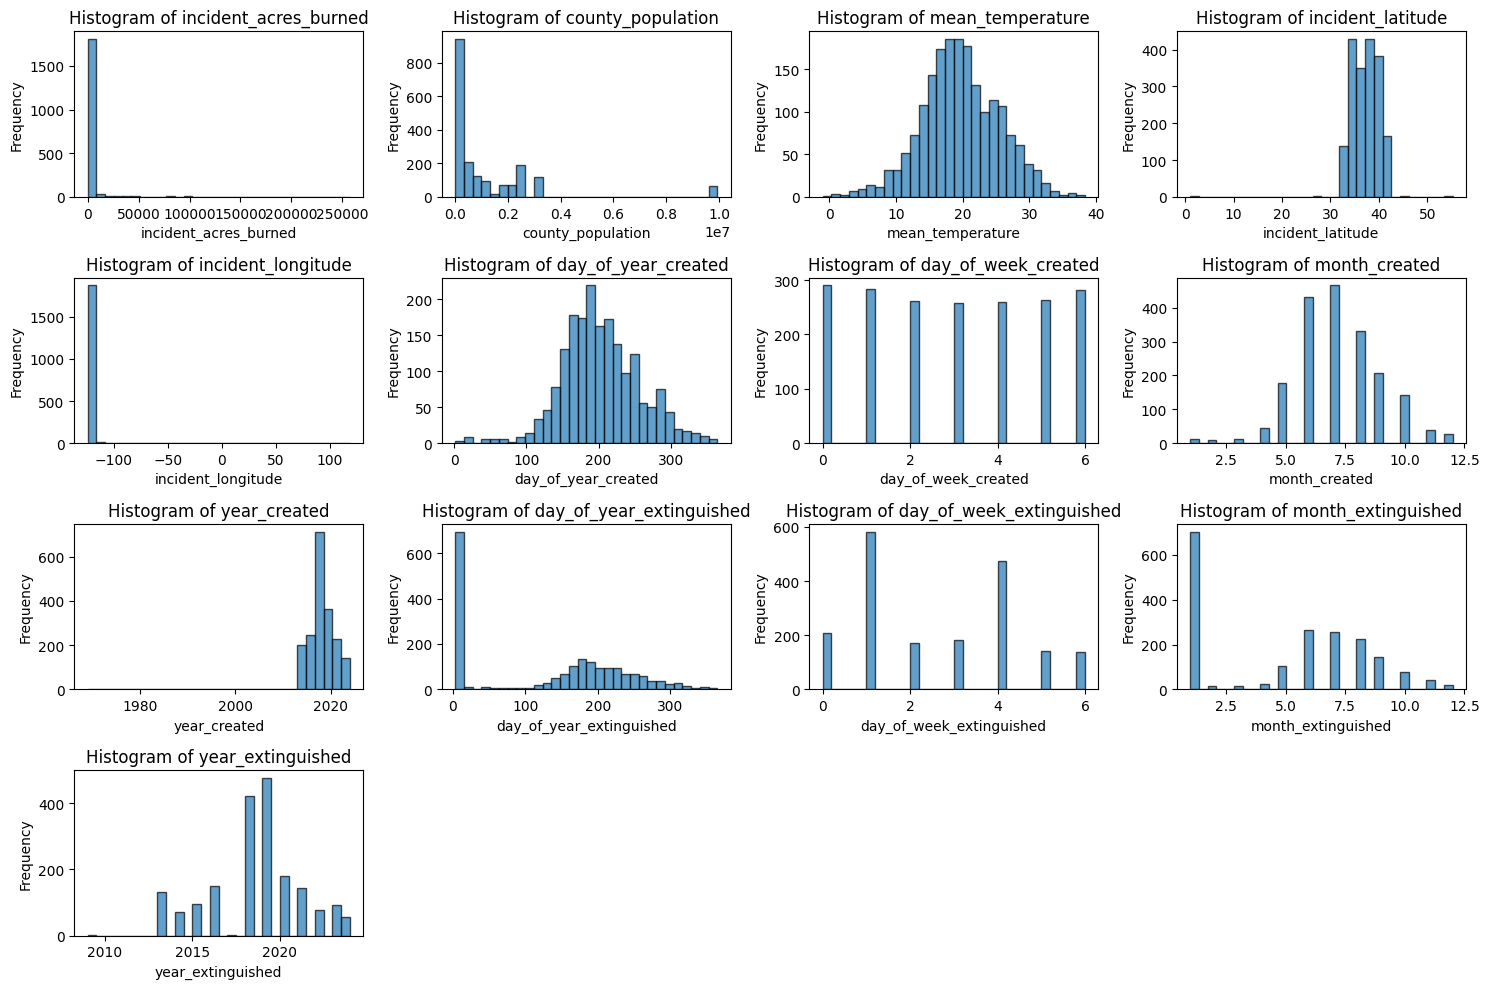

In [26]:
# Select numerical columns
numerical_columns = merged_data[features].select_dtypes(include=['float64', 'int64']).columns

# Create a figure with subplots for numerical columns
fig, axes = plt.subplots(nrows=4, ncols=4, figsize=(15, 10))
axes = axes.flatten()

for i, column in enumerate(numerical_columns):
    axes[i].hist(merged_data[column].dropna(), bins=30, edgecolor='k', alpha=0.7)
    axes[i].set_title(f'Histogram of {column}')
    axes[i].set_xlabel(column)
    axes[i].set_ylabel('Frequency')

# Hide any extra subplots
for j in range(i+1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


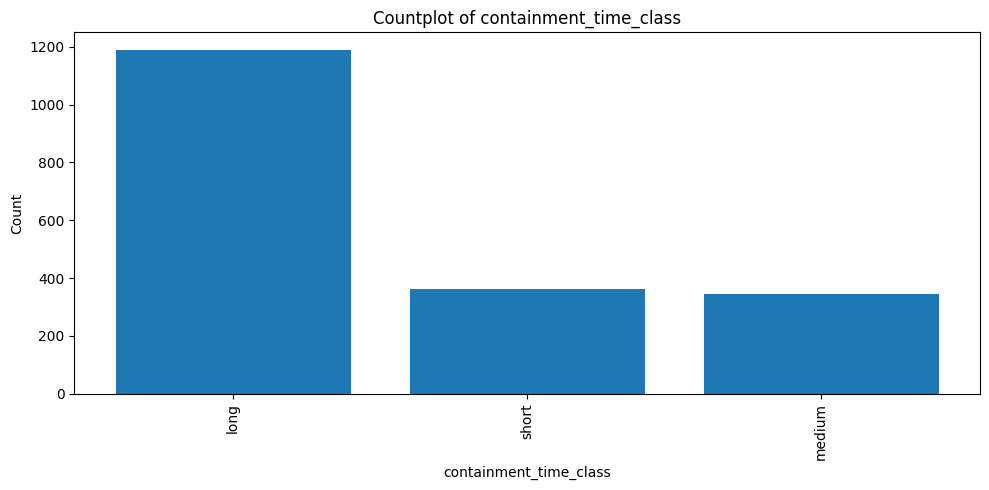

In [24]:
# Plot bar plot for the target variable
plt.figure(figsize=(10, 5))
value_counts = merged_data[target].value_counts()
plt.bar(value_counts.index, value_counts.values)
plt.title('Countplot of containment_time_class')
plt.xlabel('containment_time_class')
plt.ylabel('Count')
plt.xticks(rotation=90)

plt.tight_layout()
plt.show()


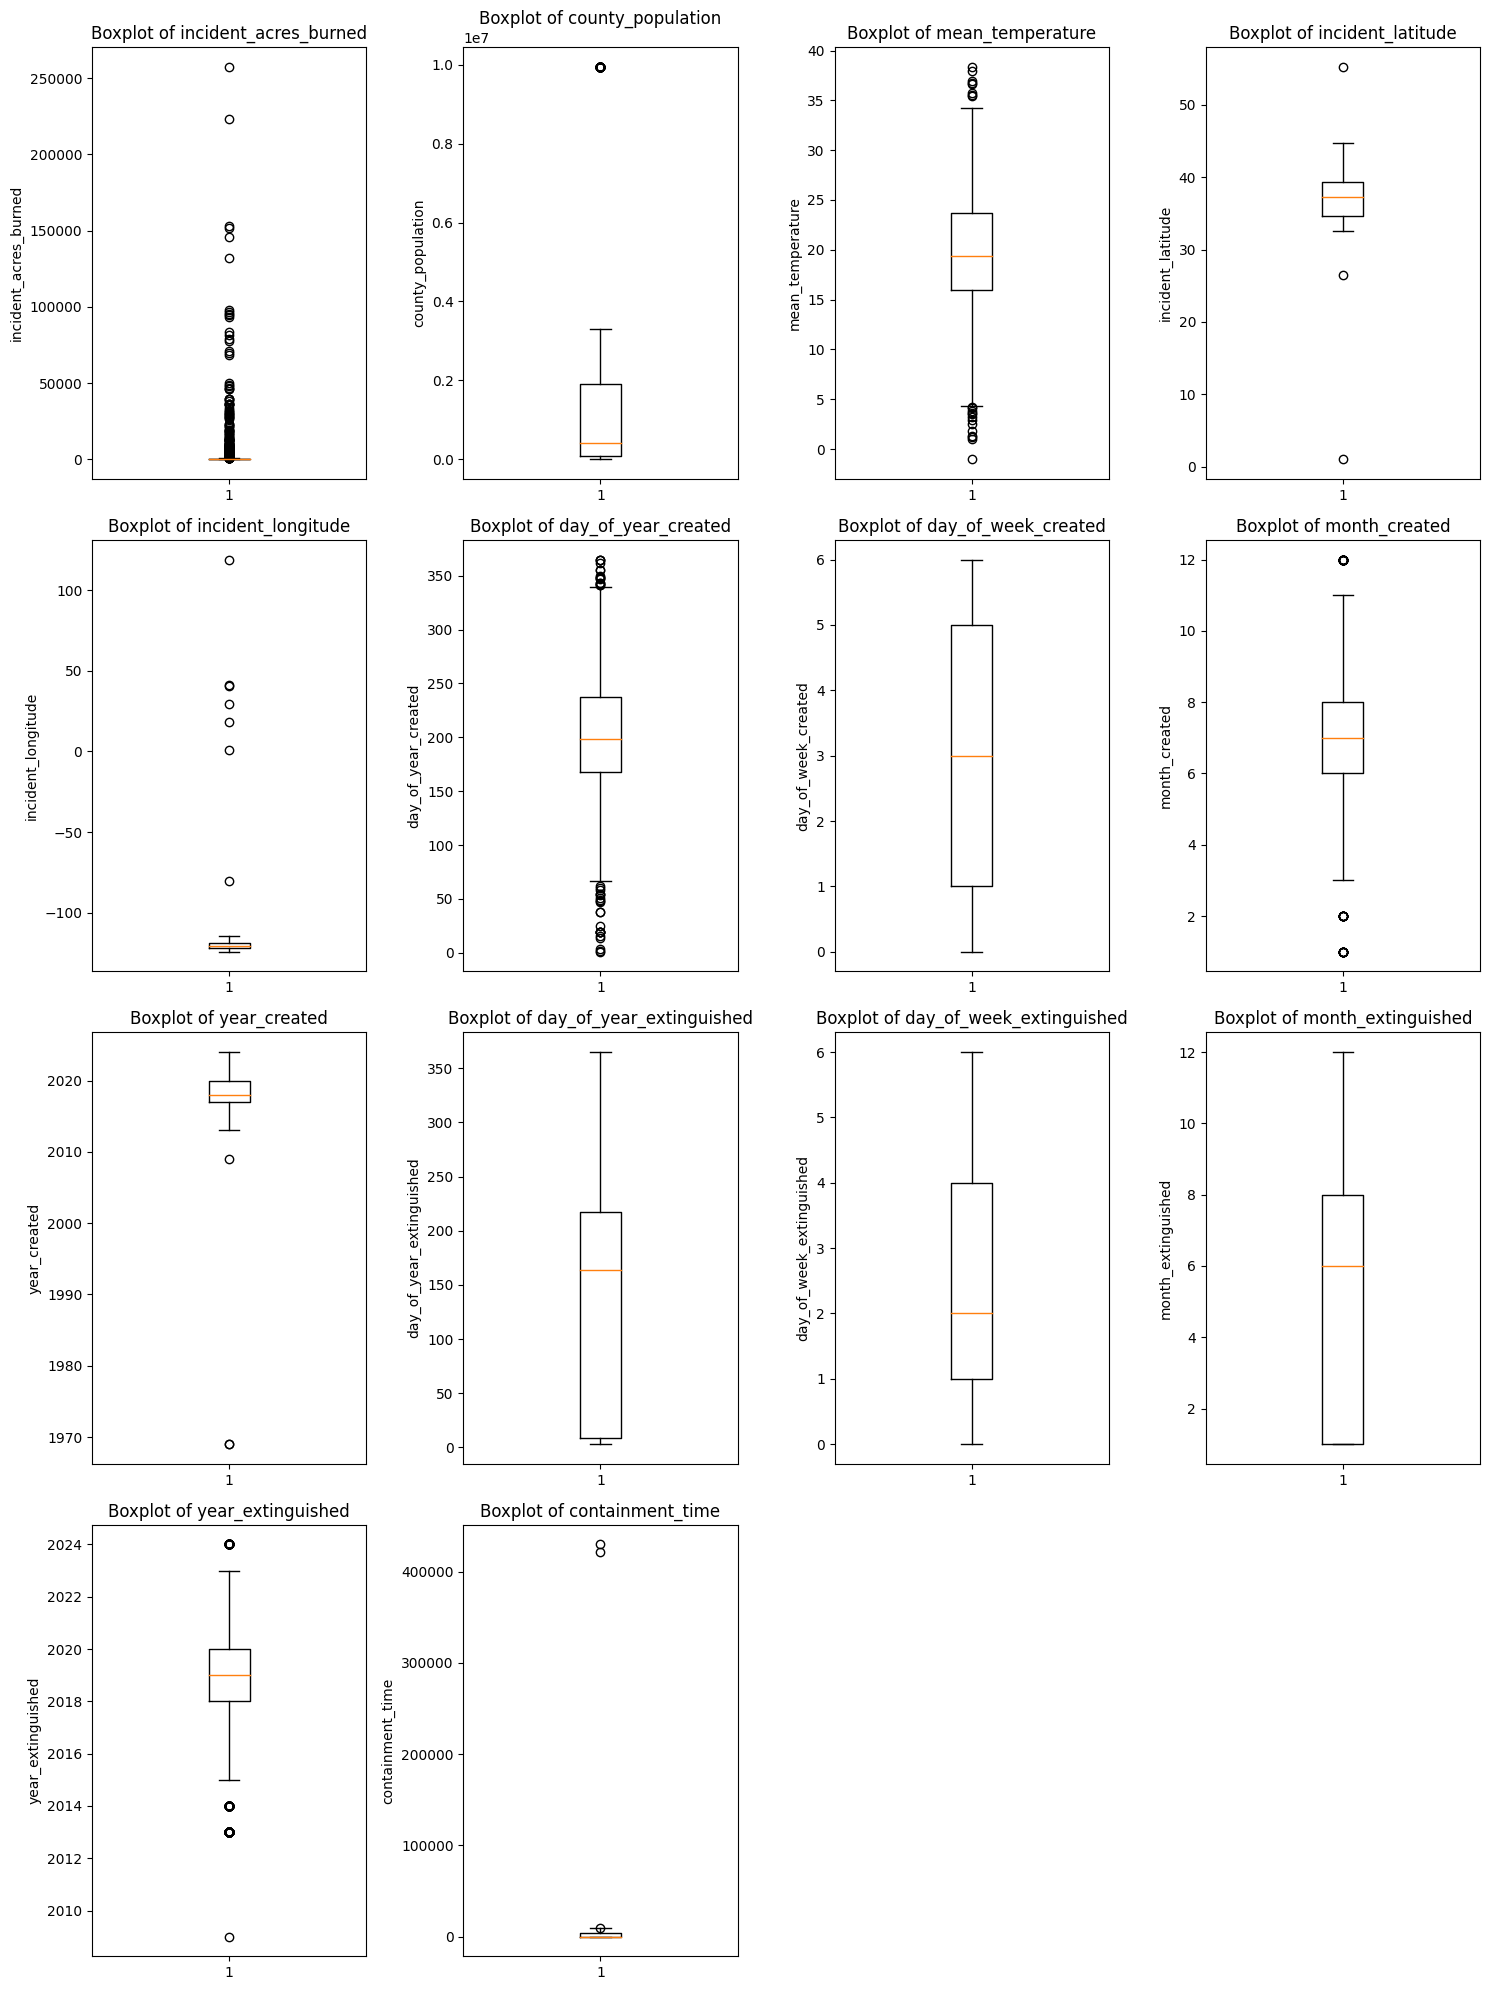

In [38]:
# Define numerical columns
numerical_columns = ['incident_acres_burned', 'county_population', 'mean_temperature', 'incident_latitude',
                     'incident_longitude', 'day_of_year_created', 'day_of_week_created', 'month_created',
                     'year_created', 'day_of_year_extinguished', 'day_of_week_extinguished', 'month_extinguished',
                     'year_extinguished', 'containment_time']

# Determine the number of columns
num_columns = len(numerical_columns)

# Calculate the number of rows needed
num_rows = (num_columns + 3) // 4  # Four plots per row

# Create subplots
fig, axes = plt.subplots(num_rows, 4, figsize=(15, num_rows * 5))

# Flatten the axes array for easy iteration
axes = axes.flatten()

# Plot each column
for ax, column in zip(axes, numerical_columns):
    ax.boxplot(merged_data[column])
    ax.set_title(f'Boxplot of {column}')
    ax.set_ylabel(column)

# Hide any remaining empty subplots
for ax in axes[num_columns:]:
    fig.delaxes(ax)

plt.tight_layout()
plt.show()
